In [1]:
!pip install openpyxl

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, VotingClassifier, RandomForestRegressor, VotingRegressor
)
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB
Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')
     FoodCategory             FoodItem per100grams Cals_per100grams  \
0     CannedFruit           Applesauce        100g           62 cal   
1     CannedFruit      Canned Apricots        100g           48 cal   
2     CannedFruit  Canned Blackberries        100g           92 cal   
3     CannedFruit   Canned Blueberries        100g           88 cal   
4     CannedFruit      Canned Cherries        100g        

<ipython-input-3-6824cf318730>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_categories_count.index, y=unique_categories_count.values, palette="viridis")


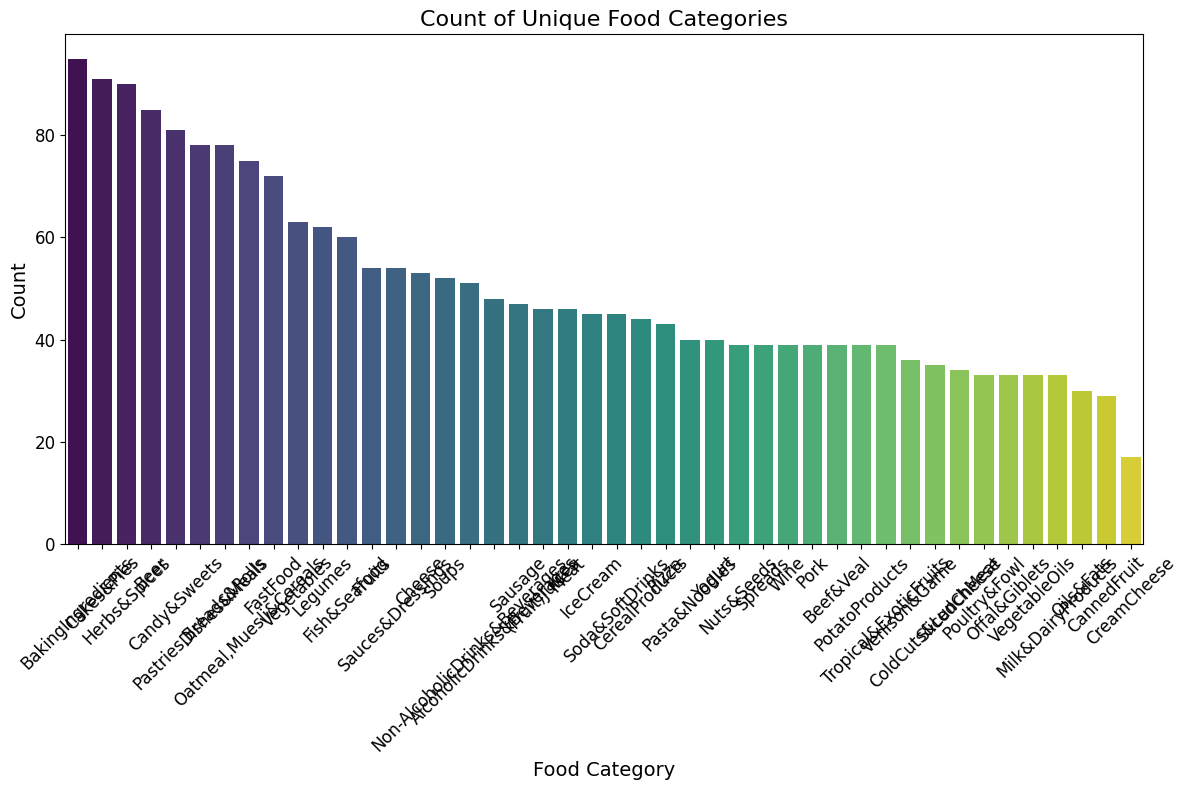

<ipython-input-3-6824cf318730>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_items_count.index, y=unique_items_count.values, palette="magma")


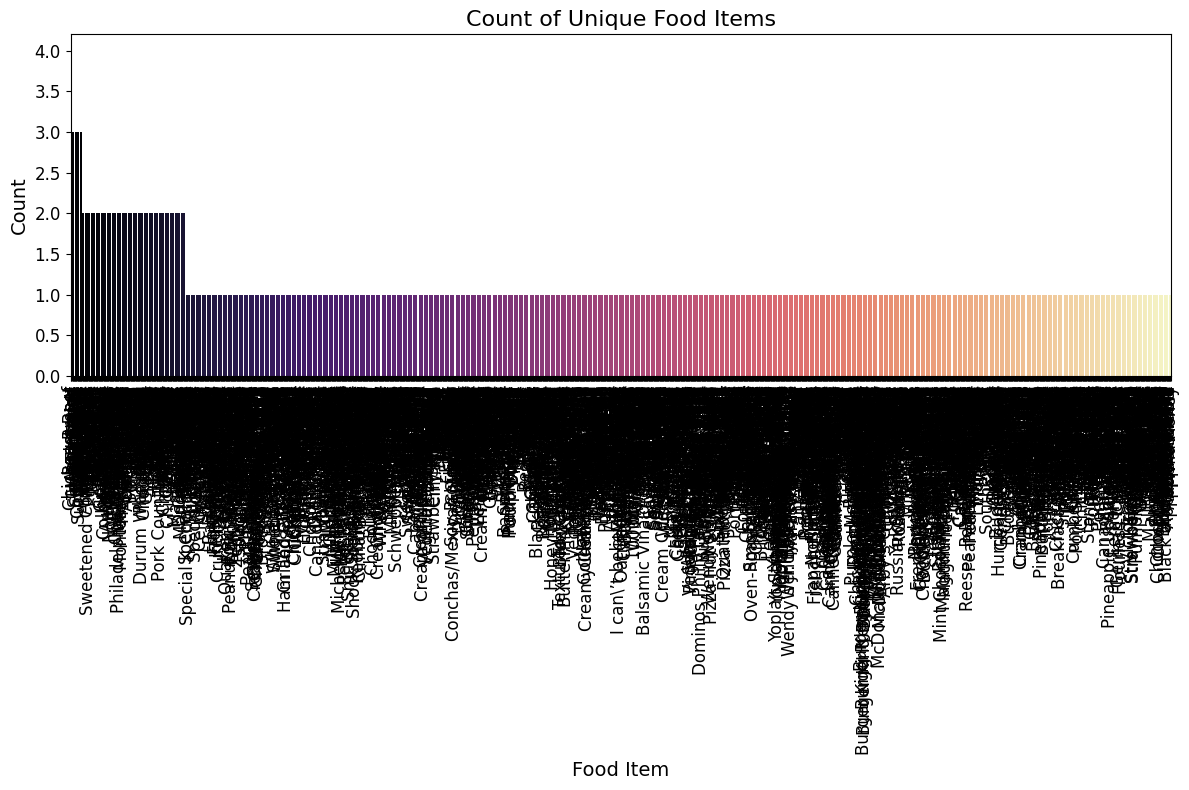

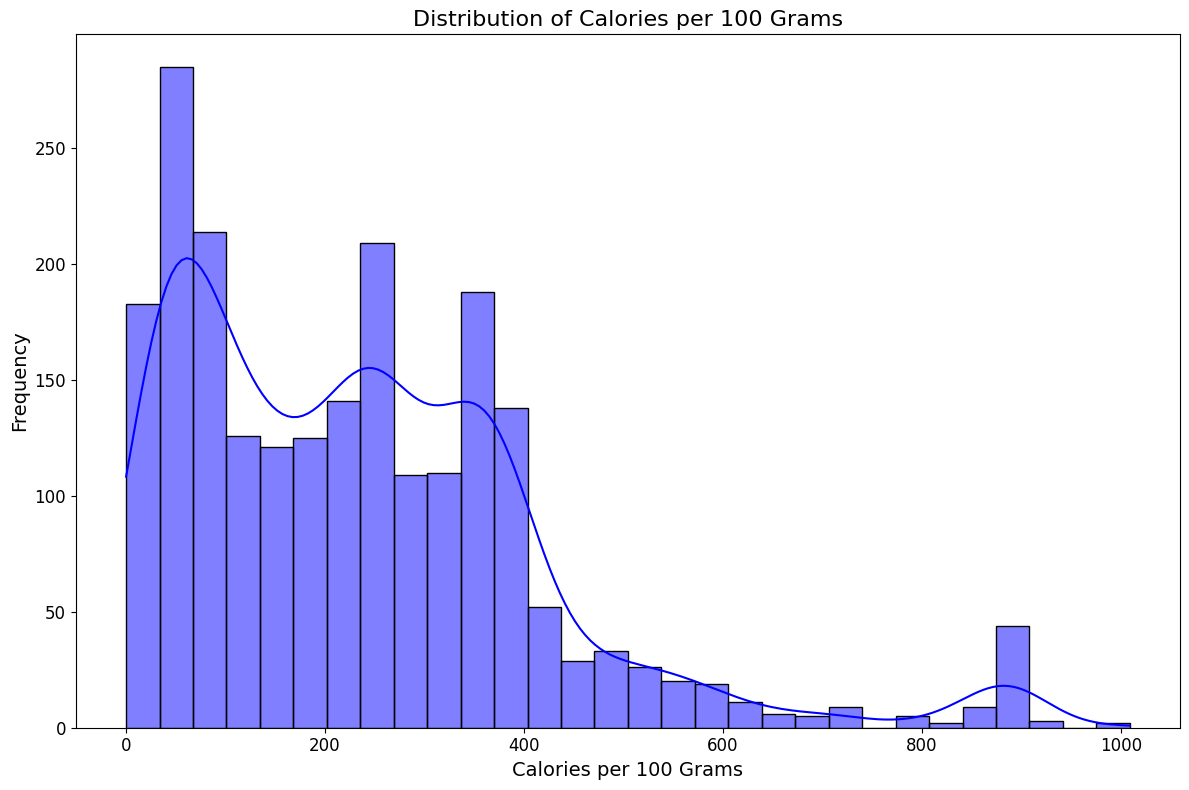

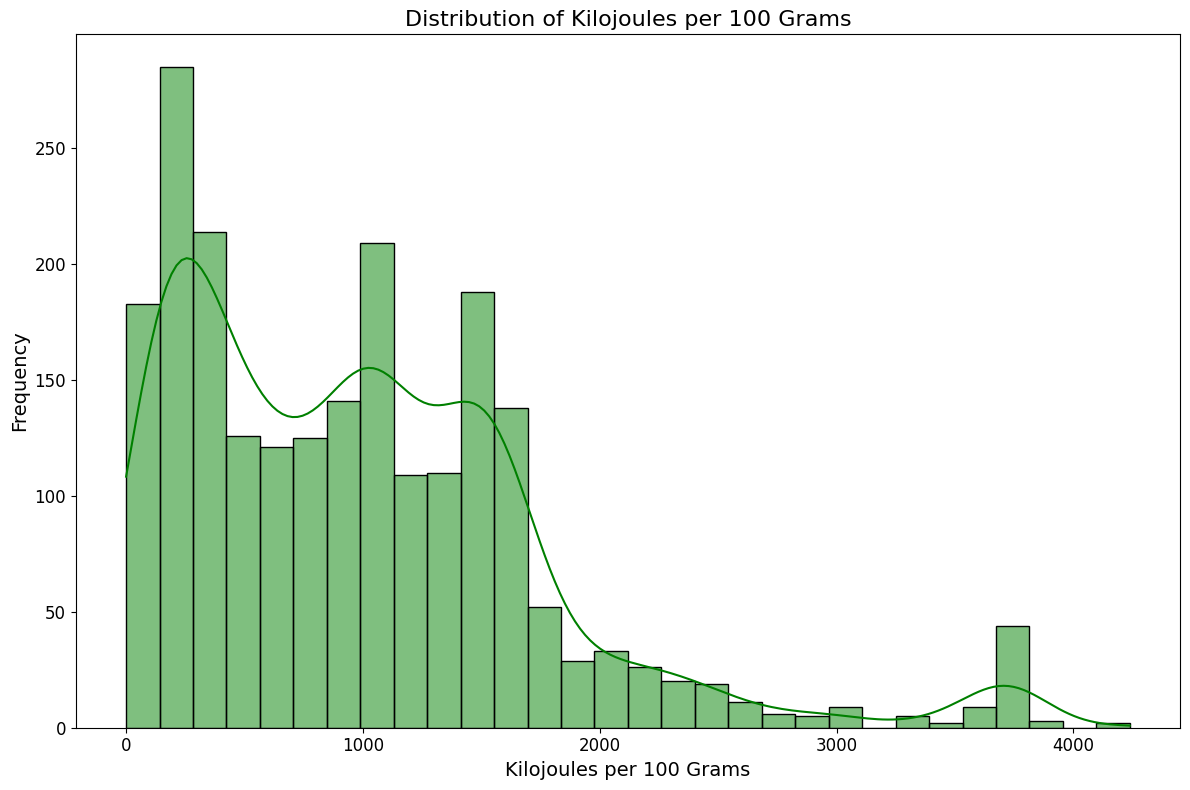

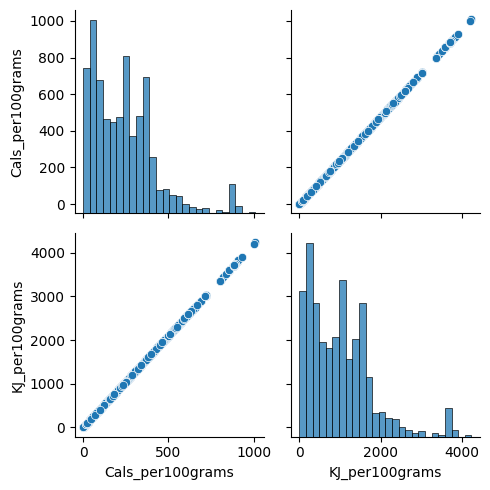

     per100grams  Cals_per100grams  KJ_per100grams  \
0           100g                62             260   
1           100g                48             202   
2           100g                92             386   
3           100g                88             370   
4           100g                54             227   
...          ...               ...             ...   
2220        100g               617            2591   
2221        100g               233             979   
2222        100g               717            3011   
2223        100g               180             756   
2224        100g               286            1201   

      FoodCategory_(Fruit)Juices  FoodCategory_AlcoholicDrinks&Beverages  \
0                          False                                   False   
1                          False                                   False   
2                          False                                   False   
3                          False               

In [3]:
# Step 1: Data Preprocessing
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/food/calories.csv")
data.info()

# Check column names in the dataset
print(data.columns)

# Remove duplicated rows
data.drop_duplicates(inplace=True)

# Print all the data
print(data)

# Get the shape of the data
print(data.shape)

# List unique food categories
unique_categories = data['FoodCategory'].unique()
print("Unique Food Categories:", unique_categories)

# List unique food items
unique_items = data['FoodItem'].unique()
print("Unique Food Items:", unique_items)

# Count of unique food categories
unique_categories_count = data['FoodCategory'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=unique_categories_count.index, y=unique_categories_count.values, palette="viridis")
plt.title('Count of Unique Food Categories', fontsize=16)
plt.xlabel('Food Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Count of unique food items
unique_items_count = data['FoodItem'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=unique_items_count.index, y=unique_items_count.values, palette="magma")
plt.title('Count of Unique Food Items', fontsize=16)
plt.xlabel('Food Item', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Preprocess 'Cals_per100grams' and 'KJ_per100grams' columns
data['Cals_per100grams'] = data['Cals_per100grams'].apply(lambda x: int(x.split()[0]))
data['KJ_per100grams'] = data['KJ_per100grams'].apply(lambda x: int(x.split()[0]))

# Distribution of Calories per 100 Grams
plt.figure(figsize=(12, 8))
sns.histplot(data['Cals_per100grams'], bins=30, kde=True, color='blue')
plt.title('Distribution of Calories per 100 Grams', fontsize=16)
plt.xlabel('Calories per 100 Grams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Distribution of Kilojoules per 100 Grams
plt.figure(figsize=(12, 8))
sns.histplot(data['KJ_per100grams'], bins=30, kde=True, color='green')
plt.title('Distribution of Kilojoules per 100 Grams', fontsize=16)
plt.xlabel('Kilojoules per 100 Grams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Pair plot for numerical attributes
sns.pairplot(data[['Cals_per100grams', 'KJ_per100grams']])
plt.tight_layout()
plt.show()

# Convert categorical variables to numerical format using one-hot encoding
data = pd.get_dummies(data, columns=['FoodCategory', 'FoodItem'])

print(data)
print(data.shape)


In [5]:
# Step 2: Split the data into features and target variable
data.drop('per100grams', axis=1, inplace=True)
X = data.drop('Cals_per100grams', axis=1)
y = data['Cals_per100grams']
data.head()

,Cals_per100grams,KJ_per100grams,FoodCategory_(Fruit)Juices,FoodCategory_AlcoholicDrinks&Beverages,FoodCategory_BakingIngredients,FoodCategory_Beef&Veal,FoodCategory_Beer,FoodCategory_Cakes&Pies,FoodCategory_Candy&Sweets,FoodCategory_CannedFruit,...,FoodItem_Young Gouda,FoodItem_Yuba,FoodItem_Yukon Gold Potatoes,FoodItem_Zander,FoodItem_Zesty Italian Dressing,FoodItem_Zinfandel,FoodItem_Zinger,FoodItem_Zinger Burger,FoodItem_Ziti,FoodItem_Zucchini
0,62,260,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,48,202,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,92,386,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,88,370,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,54,227,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# step 3: Split the data into training and testing sets using 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize features (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)

# Train the model
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Ridge Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Ridge Regression Evaluation Metrics:
Mean Absolute Error (MAE): 8.70699782915222
Root Mean Squared Error (RMSE): 11.71688375413151
R-squared (R2) Score: 0.996180234645305


In [8]:
# Initialize and train the SVR regressor
svr_regressor = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svr_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("SVR Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


SVR Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.056648179605854575
Root Mean Squared Error (RMSE): 0.06679943110570326
R-squared (R2) Score: 0.999999875846785


In [9]:
# Step 2: Train the Random Forest Regressor
# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
rf_regressor.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Random Forest Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.18680898876404484
Root Mean Squared Error (RMSE): 0.5956646745396138
R-squared (R2) Score: 0.9999901277502516


In [16]:
# Initialize Individual Regressors
svr_regressor = SVR(kernel='rbf')  # SVR regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest regressor
ridge_regressor = Ridge(alpha=1.0)  # Ridge regressor

#Create a Voting Regressor Ensemble
voting_regressor = VotingRegressor(estimators=[
    ('svr', svr_regressor),
    ('rf', rf_regressor),
    ('ridge', ridge_regressor)
])

# Train the Voting Regressor Ensemble
voting_regressor.fit(X_train, y_train)

# Evaluate the Voting Regressor Ensemble
# Make predictions on the test set
y_pred = voting_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Voting Regressor Ensemble Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Voting Regressor Ensemble Evaluation Metrics:
Mean Absolute Error (MAE): 10.367123913942267
Root Mean Squared Error (RMSE): 33.708334497174256
R-squared (R2) Score: 0.9683854479431904
